# Chapter 6
# Function Approximation

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import *
%matplotlib notebook
import matplotlib as mpl
#mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 100
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png', 'pdf')
%config InlineBackend.figure_format = 'retina'
#https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

import seaborn as sns
sns.set()
#sns.set_style(style= "whitegrid")
#plt.style.available
plt.style.use('fivethirtyeight')

In many computational economic applications, one must approximate an analytically
intractable real-valued function $f$ with a computationally tractable function $\hat f$.

- In some applications, $f$ in principle can be evaluated at any point of its domain, but we wish to replace it with an approximation  $\hat f$ that is easier to work with numerically

- In other applications, $f$ is defined implicitly via a functional equation, but the equation lacks closed-form solution and we wish to compute an approximate solution $\hat f$



Two types of function approximation problems arise often in computational economic
applications. 

- In the interpolation problem, one knows the value of a function
$f$ at specified points in its domain and must choose an approximant $\hat f$ from a family
of "nice", tractable functions that matches the original function at the known evaluation
points. The interpolation problem can be *generalized* to include the value of
the function's first or higher derivatives at specified points.

1. We will first look into interpolation, a general strategy for forming a tractable approximation to a function that can be evaluated at any point of its domain


2. Then we will consider methods for solving functional equations that are based on interpolation principles

In this chapter we discuss methods for approximating functions and focus on
the two most generally practical techniques: **Chebychev polynomial and polynomial
spline approximation**. 


In addition we discuss the use of **piecewise linear functions
with finite difierence approximations for derivatives**. 


Univariate function interpolation
methods are developed first and then are generalized to multivariate function
interpolation methods. 

In the final section, we introduce the **collocation method**, a
natural generalization of interpolation methods that may be used to solve a variety
of functional equations. 

Collocation will be used extensively in Chapters 9 and 11 for
solving dynamic economic models.

## 6.1 Interpolation Principles
Interpolation involves the use of an approximating function, $\hat f$, that is easy to evaluate
in place of the function of interest, $f$. The first step in designing an interpolation
scheme is choose a family of approximating functions.

We will confine ourselves to
families of functions that can be written as a *linear combination* of a set of n linearly
independent *basis functions* $\phi_1; \phi_2; ... ; \phi_n$:


$$f(x) \approx \hat f(x)  \equiv \sum_{j=1}^n c_j{\phi}_j(x),$$

The basis coefficients $c_1, c_2,...,c_n$ can be fixed by requiring  $\hat f$ to interpolate, that is, agree with $f$, at interpolation nodes
$x_1,x_2,...x_n$ of our choosing.



For a given set of basis functions and nodes, computing the basis coefficients reduces to solving a **linear interpolation equation**

$$ \sum_{j=1}^n c_j{\phi}_j(x_i) = f(x_i),\, i = 1,2,..,n$$


The interpolation equation can also be written in the matrix form

$$ \Phi c = y $$

where

$$ \Phi_{ij} = \phi_j(x_i) \,\, \text{and} \,\, y_i = f(x_i)  $$

for $i = 1,2,..,n$  and $j = 1,2,..,n$ , and $c$ is the $n \times 1$  vector of basis coefficients to be determined

- Interpolation schemes differ only in how the basis functions $\phi_j$ and interpolation nodes $x_i$ are chosen


- In theory, an interpolation scheme is well-defined if the basis functions and interpolation nodes are chosen so that the **interpolation matrix** $\Phi$ is nonsingular

- In computational practice, however, the interpolation matrix must meet the more stringent requirement that it is not ill-conditioned

- Ideally, an interpolation scheme should also satisfy various conditions
  - It should be theoretically possible to achieve an arbitrarily accurate approximation by increasing the number of basis functions and
interpolation nodes
  - It should be possible to solve the interpolation equation quickly and accurately
  - It should be relatively inexpensive to evaluate, differentiate, integrate or otherwise work with the approximation
- In what follows, we develop interpolation schemes based on two classes of basis functions
  - orthogonal polynomials
  - piecewise polynomial splines

---

## 6.2 Polynomial Interpolation


Polynomial interpolation is motivated by the
Weierstrass theorem which asserts that any
continuous real-valued function can be
approximated over a bounded interval to an
arbitrary degree of accuracy by a polynomial



According to the Weierstrass Theorem, any continuous real-valued function f defined
on a bounded interval $[a; b]$ of the real line can be approximated to any degree of accuracy
using a polynomial. More specifically, for any $\epsilon > 0$, there exists a polynomial
$p$ such that



The Weierstrass theorem provides strong motivation for using polynomials to approximate
continuous functions. The theorem, however, is not very practical. It gives no
guidance on how to find a good polynomial approximant. It does not even state what
order polynomial is required to achieve the required level of accuracy.

#### Naïve Polynomial Interpolation

One apparently reasonable way to construct a $n^{th}$-degree polynomial approximant for a function $f$ is to form the unique $(n - 1)^{th}$-order polynomial

$$\hat f(x)  \equiv \sum_{j=1}^n c_j x^j,$$

in terms of the monomial basis functions $1, x, x^2,… , x^n$

then fix the $n + 1$ unknown basis coefficients $c_1, c_2,...,c_n$  by requiring $\hat f(x)$ to agree with $f(x)$ at the $n+ 1$ equally-spaced interpolation nodes $x_i = a + ih$, where $h = (b - a)/n$

#### Constructing the interpolation polynomial

Suppose that the interpolation polynomial is in the form

$${\displaystyle p(x)=a_{n}x^{n}+a_{n-1}x^{n-1}+\cdots +a_{2}x^{2}+a_{1}x+a_{0}.\qquad (1)} $$

The statement that p interpolates the data points means that
$${\displaystyle p(x_{i})=y_{i}\qquad {\mbox{for all }}i\in \left\{0,1,\dots ,n\right\}.}$$


If we substitute equation (1) in here, we get a system of linear equations in the coefficients ak. The system in matrix-vector form reads

$$\begin{bmatrix}
x_0^n  & x_0^{n-1} & x_0^{n-2} & \ldots & x_0 & 1 \\
x_1^n  & x_1^{n-1} & x_1^{n-2} & \ldots & x_1 & 1 \\
\vdots & \vdots    & \vdots    &        & \vdots & \vdots \\
x_n^n  & x_n^{n-1} & x_n^{n-2} & \ldots & x_n & 1
\end{bmatrix}
\begin{bmatrix} a_n \\ a_{n-1} \\ \vdots \\ a_0 \end{bmatrix}  =
\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix}.$$

ref: https://en.wikipedia.org/wiki/Polynomial_interpolation

where $n$ is the polynomial degree.

Another important property of polynomials is given by the [Weierstrass Approximation Theorem](http://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem), which states given a cotinuous function $f$ defined on a interval $[a,b]$, for all $\epsilon >0$, there exits a polynomial $P(x)$ such that

$$|f(x) - P(x)|<\epsilon\ \ \ \ \  \mbox{for all }\ x\ \mbox{ in }\ [a,b].$$

This theorem guarantees the existence of such a polynomial, however it is necessary to propose a scheme to build it.

<IPython.core.display.Javascript object>


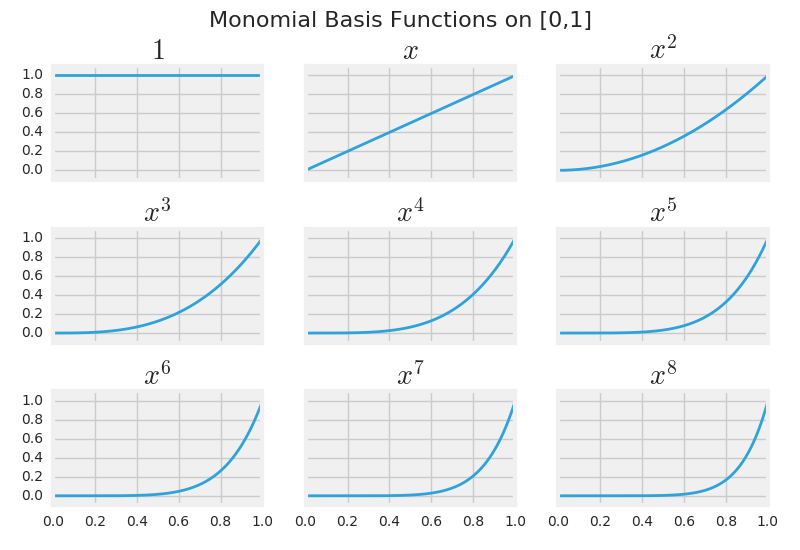

In [11]:

# Simple data to display in various forms
x = np.linspace(0, 1, 400);


# Four axes, returned as a 3-d array
fig, axarr = plt.subplots(3, 3,sharex=True, sharey=True);

axarr[0, 0].plot(x, x**0, linewidth=2.0);
#plt.ylim(0,1.1)
axarr[0, 0].set_ylim(-0.1,1.1)
axarr[0, 0].set_title(r'$1$');
axarr[0, 1].plot(x, x, linewidth=2.0);
axarr[0, 1].set_title(r'$x$');
axarr[0, 2].plot(x, x**2, linewidth=2.0);
axarr[0, 2].set_title(r'$x^2$');

axarr[1, 0].plot(x, x ** 3, linewidth=2.0);
axarr[1, 0].set_title(r'$x^3$');
axarr[1, 1].plot(x, x ** 4, linewidth=2.0);
axarr[1, 1].set_title(r'$x^4$');
axarr[1, 2].plot(x, x ** 5, linewidth=2.0);
axarr[1, 2].set_title(r'$x^5$');

axarr[2, 0].plot(x, x ** 6, linewidth=2.0);
axarr[2, 0].set_title(r'$x^6$');
axarr[2, 1].plot(x, x ** 7, linewidth=2.0);
axarr[2, 1].set_title(r'$x^7$');
axarr[2, 2].plot(x, x ** 8, linewidth=2.0);
axarr[2, 2].set_title(r'$x^8$');



# Fine-tune figure; make subplots farther from each other.
fig.subplots_adjust(hspace=0.3);

fig.suptitle("Monomial Basis Functions on [0,1]", fontsize=16)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.88)

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False);
plt.setp([a.get_yticklabels() for a in axarr[:, 2]], visible=False);



In practice, however, polynomial interpolation at evenly spaced nodes often *does not* produce an accurate approximant. 

In fact, there are well-behaved functions for which polynomial approximants with evenly spaced nodes rapidly deteriorate, rather than improve, as the degree of approximation n rises.


This polynomial interpolation scheme suffers from two serious, albeit distinct problems

1. First, the interpolation matrix is a Vandermonde matrix, which becomes **increasingly ill-conditioned** as the degree of the interpolating polynomial rises

2. Second, there are functions for which the approximation **error explodes** as the degree of the interpolating polynomial rises, e.g. the Runge’s function

$$f(x) = {1 \over (1 +25x^2)} , − 1 ≤ x ≤ 1$$


3. Naïve polynomial interpolation reflects a poor choice of both the basis functions (monomials) and the interpolation nodes (equally-spaced points)


### Runge Function

<IPython.core.display.Javascript object>


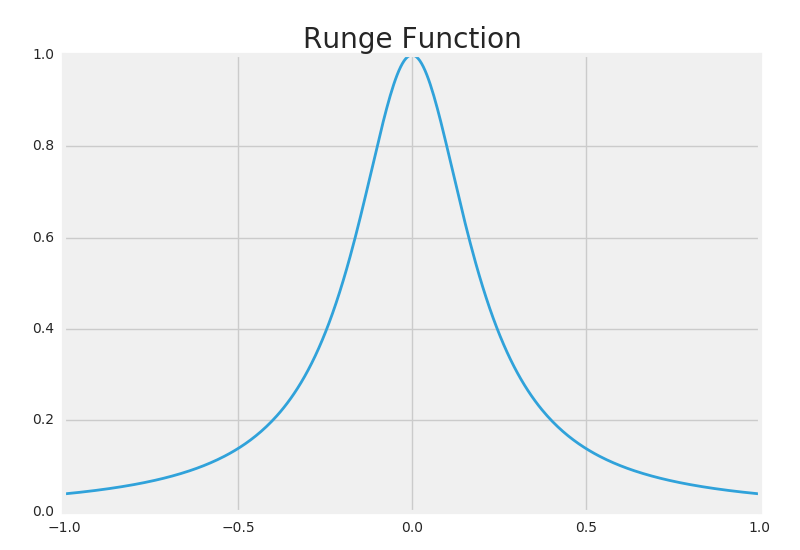

In [4]:
x = np.linspace(-1,1, 400)
def runge(x):
    return 1/(1+25*x**2)


fig, ax = plt.subplots(1, 1,sharex=True, sharey=True);

ax.plot(x, runge(x), linewidth=2.0);
ax.set_title("Runge Function");


#### Chebychev Polynomial Interpolation



1. Numerical analysis theory and empirical experience both suggest that polynomial approximants over a bounded interval $[a; b]$ should be constructed by interpolating the underlying function at the so-called *Chebychev nodes*:


2. The Chebychev nodes are not evenly spaced and do not include the endpoints of the approximation interval


3. They are more closely spaced near the endpoints of the approximation interval and less so near the center

For nodes over an arbitrary interval [a, b] an affine transformation can be used:

$${\displaystyle x_{k}={\frac {1}{2}}(a+b)+{\frac {1}{2}}(b-a)\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\ldots ,n.}$$

In [5]:
#Chebychev Nodes on [0,1]

a=0
b=1
n = 10
xc = (a+b)/2 + (b-a)/2*np.cos(np.pi/n*((np.arange(1,n)-.5)));     # Chebyshev nodes


<IPython.core.display.Javascript object>


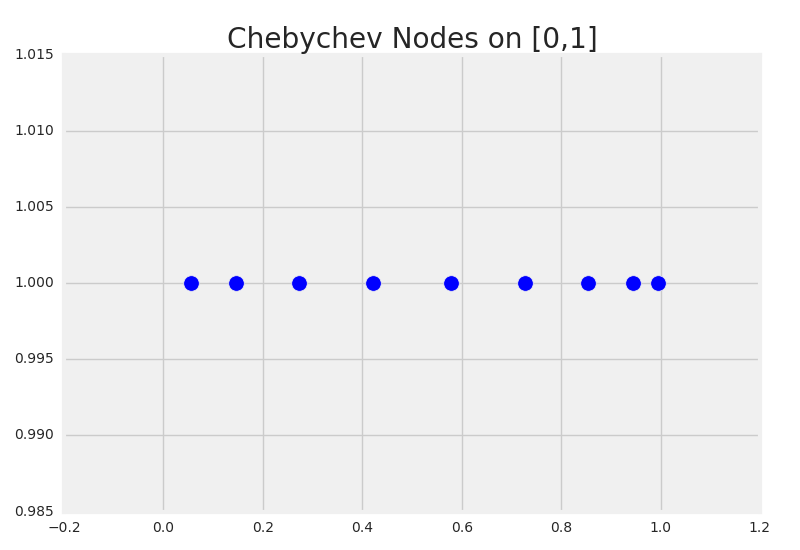

In [6]:
plt.figure()
plt.scatter(xc,xc**0, s = 125)
plt.title("Chebychev Nodes on [0,1]")


- Interpolating at the Chebychev nodes offers many advantages
- However, merely interpolating at the Chebychev nodes does not eliminate ill-conditioning
- Ill-conditioning stems from the choice of basis functions, not the choice of interpolation nodes
- Fortunately, there is an alternative to the standard monomial basis that is ideal for interpolating at Chebychev nodes

The optimal basis for interpolating at Chebychev nodes is called the **Chebychev polynomial basis**


The Chebyshev polynomials of the first kind are defined by the recurrence relation

$${\displaystyle {\begin{aligned}T_{0}(x)&=1\\T_{1}(x)&=x\\T_{n+1}(x)&=2xT_{n}(x)-T_{n-1}(x).\end{aligned}}} $$




ref: https://en.wikipedia.org/wiki/Chebyshev_polynomials

The first few Chebyshev polynomials of the first kind are

$${\displaystyle {\begin{aligned}T_{0}(x)&=1\\T_{1}(x)&=x\\T_{2}(x)&=2x^{2}-1\\T_{3}(x)&=4x^{3}-3x\\T_{4}(x)&=8x^{4}-8x^{2}+1\\T_{5}(x)&=16x^{5}-20x^{3}+5x\\T_{6}(x)&=32x^{6}-48x^{4}+18x^{2}-1\\T_{7}(x)&=64x^{7}-112x^{5}+56x^{3}-7x\\T_{8}(x)&=128x^{8}-256x^{6}+160x^{4}-32x^{2}+1\\T_{9}(x)&=256x^{9}-576x^{7}+432x^{5}-120x^{3}+9x\\T_{10}(x)&=512x^{10}-1280x^{8}+1120x^{6}-400x^{4}+50x^{2}-1\\T_{11}(x)&=1024x^{11}-2816x^{9}+2816x^{7}-1232x^{5}+220x^{3}-11x\end{aligned}}}$$

<IPython.core.display.Javascript object>


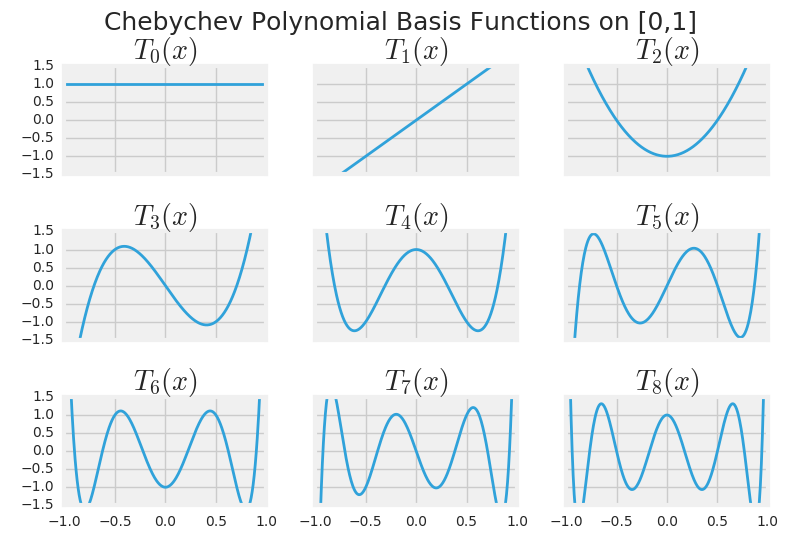

In [7]:
# Chebychev Polynomial Basis Functions on [0,1]


# Simple data to display in various forms
x = np.linspace(-1, 1, 400);


# Four axes, returned as a 3-d array
fig, axarr = plt.subplots(3, 3,sharex=True, sharey=True);

axarr[0, 0].plot(x, x**0, linewidth=2.0);
#plt.ylim(0,1.1)
axarr[0, 0].set_ylim(-1.5,1.5)
axarr[0, 0].set_title(r'$T_{0}(x)$');
axarr[0, 1].plot(x, 2*x, linewidth=2.0);
axarr[0, 1].set_title(r'$T_{1}(x)$');
axarr[0, 2].plot(x, 4*x**2-1, linewidth=2.0);
axarr[0, 2].set_title(r'$T_{2}(x)$');

axarr[1, 0].plot(x, 8*x ** 3-4*x, linewidth=2.0);
axarr[1, 0].set_title(r'$T_{3}(x)$');
axarr[1, 1].plot(x, 16*x ** 4-12*x**2+1, linewidth=2.0);
axarr[1, 1].set_title(r'$T_{4}(x)$');
axarr[1, 2].plot(x, 32*x ** 5-32*x**3+6*x, linewidth=2.0);
axarr[1, 2].set_title(r'$T_{5}(x)$');

axarr[2, 0].plot(x, 64*x ** 6-80*x**4+24*x**2-1, linewidth=2.0);
axarr[2, 0].set_title(r'$T_{6}(x)$');
axarr[2, 1].plot(x, 128*x ** 7-192*x**5+80*x**3-8*x, linewidth=2.0);
axarr[2, 1].set_title(r'$T_{7}(x)$');
axarr[2, 2].plot(x, 256*x ** 8-448*x**6 +240*x**4-40*x**2+1, linewidth=2.0);
axarr[2, 2].set_title(r'$T_{8}(x)$');



# Fine-tune figure; make subplots farther from each other.
fig.subplots_adjust(hspace=0.3);

fig.suptitle("Chebychev Polynomial Basis Functions on [0,1]", fontsize=18)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.88)

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False);
plt.setp([a.get_yticklabels() for a in axarr[:, 2]], visible=False);

Polynomial in Chebyshev form[edit]
An arbitrary polynomial of degree $N$ can be written in terms of the Chebyshev polynomials of the first kind. Such a polynomial $p(x)$ is of the form

$${\displaystyle p(x)=\sum _{n=0}^{N}c_{n}T_{n}(x).} $$



- Combining the Chebychev basis polynomials and Chebychev interpolation nodes yields an extremely wellconditioned interpolation equation
  - The **Chebychev interpolation matrix** is orthogonal, that is, $\Phi' \Phi$ is diagonal
  - Its condition number is $\sqrt{2}$, regardless of the degree of interpolation, which is near the absolute minimum of 1
- As a consequence, basis coefficients can be computed accurately, regardless of the degree of the approximating polynomial

When the function being approximated is very smooth, Chebychev node polynomial interpolants typically exhibit errors that oscillate fairly evenly throughout the interval of approximation

This feature is commonly referred to as the **Chebychev equi-oscillation property**

## 6.3 Piecewise Polynomial Splines

Piecewise polynomial splines, or **simply splines for short**, are a rich, fexible class of functions that may be used instead of high degree polynomials to approximate a real-valued function over a bounded interval.

Generally, an order $k$ spline consists of series of $k^{th}$ order polynomial segments spliced together so as to **preserve continuity of
derivatives of order $k-1$ or less.** 

The points at which the polynomial pieces are spliced together, $ v_1 < v_2 < ... < v_p$, are called the breakpoints of the spline. By convention, the first and last breakpoints are the endpoints of the interval of approximation $[a; b]$.


- Two classes of splines are often employed in practice 
  -  A first-order or linear spline is a series of **line segments** spliced together to form a continuous function
  - A third-order or cubic spline is a series of **cubic polynomials segments** spliced together to form a twice continuously differentiable function

## 6.4 Piecewise-Linear Basis Functions


- Linear splines use line segments to connect points on the graph of the function to be approximated


- They are particularly easy to construct and work with in practice, which explains their widespread popularity


- Despite their simplicity, linear splines have many virtues. For problems in which the function being approximated is not-smooth and may even exhibit discontinuities, linear splines can still provide reasonable approximations. Unfortunately, derivatives of linear splines are discontinuous, piecewise constant functions.


<IPython.core.display.Javascript object>


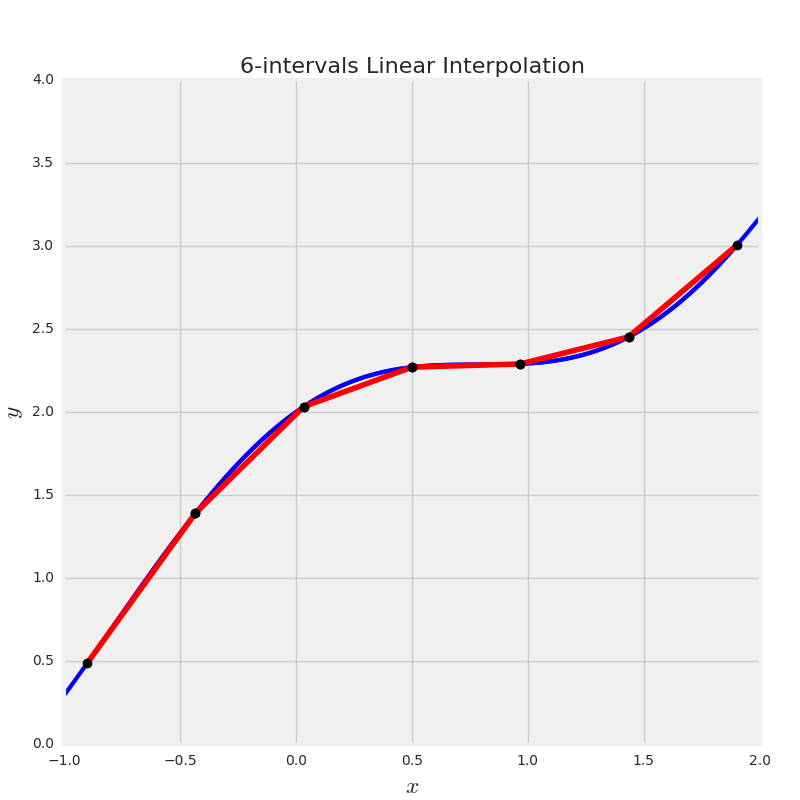

In [8]:
#Quadrature method
def Interpolation( f, X, xmin, xmax, ymin=0, ymax=1, fig=None, leg=True ):
    #f(x_i) values
    Y = f( X )
    
    #X array
    Xarray = np.linspace( xmin, xmax, 1000 )
    #X area
    Xarea = np.linspace( X[0], X[-1], 1000 )
    #F array
    Yarray = f( Xarray )
    
    #Lagrange polynomial
    Ln = interp.lagrange( X, Y )
    #Interpolated array
    Parray = Ln( Xarray )
    #Interpolated array for area
    Parea = Ln( Xarea )
    
    #Plotting
    if fig==None:
        fig = plt.figure( figsize = (8,8) )
    ax = fig.add_subplot(111)
    #Function
    ax.plot( Xarray, Yarray, linewidth = 3, color = "blue", label="$f(x)$" )
    #Points
    ax.plot( X, Y, "o", color="black", label="points", zorder = 10 )
    #Interpolator
    ax.plot( Xarray, Parray, linewidth = 4, color = "red", label="$P_{%d}(x)$"%(len(X)-1) )
    #Area
    #ax.fill_between( Xarea, Parea, color="green", alpha=0.5 )
    
    #Format
    ax.set_title( "%d-point Interpolation"%(len(X)), fontsize=16 )
    ax.set_xlim( (xmin, xmax) )
    ax.set_ylim( (0, 4) )
    ax.set_xlabel( "$x$" )
    ax.set_ylabel( "$y$" )
    if leg:
        ax.legend( loc="upper left", fontsize=16 )
    ax.grid(1)
    
    return ax

#Function
def f(x):
    return 1+np.cos(x)**2+x

# Choose a region to integrate over and take only a few points in that region
#Quadrature with 2 points (Trapezoidal rule)

X = np.array([-0.5,1.5])

#Interpolation add-on
import scipy.interpolate as interp
# Plot both the function and the area below it in the trapezoid approximation

#Composite Quadrature method
def CompositeInterpolation( f, a, b, N, n, xmin, xmax, ymin=0, ymax=1 ):
    #X array
    X = np.linspace( a, b, N )
    
    #Plotting
    fig = plt.figure( figsize = (8,8) )
    for i in range(0,N-n,n):
        Xi = X[i:i+n+1]
        ax = Interpolation( f, Xi, X[i], X[i+n], fig=fig, leg=False )
    
    #X array
    Xarray = np.linspace( xmin, xmax, 1000 )
    #F array
    Yarray = f( Xarray )
    #Function
    ax.plot( Xarray, Yarray, linewidth = 3, color = "blue", label="$f(x)$", zorder=0 )
    ax.set_title( "%d-intervals Linear Interpolation"%(N-1), fontsize=16 )
    #Format
    plt.xlim( (xmin, xmax) )
    plt.ylim( (ymin, ymax) )
    
    return None

#Quadrature with 3 points (Simpson's rule)
CompositeInterpolation( f, a=-0.9, b=1.9, N=7, n=1, xmin=-1, xmax=2, ymin=0, ymax=4 )

### Linear Spline Basis Functions

A linear spline with
nodes    on the interval a linear combination of the   where  is the distance between the nodes evenly-spaced interpolation may be written as basis functions




## 6.5 Multidimensional Interpolation
The univariate interpolation methods discussed in the preceding sections may be extended
in a natural way to multivariate functions through the use of tensor products.

## 6.6 Choosing an Approximation Method
The most significant difference between spline and polynomial interpolation methods
is that spline basis functions have narrow supports, but polynomial basis functions
have supports that cover the entire interpolation interval. This can lead to big differences
in the quality of approximation when the function being approximated is
irregular. Discontinuities in the first or second derivatives can create problems for all
interpolation schemes. However, spline functions, due to their narrow support, can
often contain the effects of such discontinuities. Polynomial approximants, on the
other hand, allow the ill effects of discontinuities to propagate over the entire interval
of interpolation. Thus, when a function exhibits kinks, spline interpolation may be
preferable to polynomial interpolation.

## 6.7 An Approximation Toolkit
Implementing routines for multivariate function approximation involves a number of
bookkeeping details that are tedious at best. In this section we describe a set of
numerical tools that take much of the pain out of this process. This toolbox contains
several high-level functions that use a structured variable to store the essential information
that defines the function space from which approximants are drawn. The
toolbox also contains a set of middle-level routines that define the basis functions for
Chebychev polynomials and for splines and a set of low-level utilities to handle basic
computations, including tensor product manipulations.


The six high-level procedures, all prefaced by FUN, are FUNDEFN, FUNFITF, FUNFITXY,
FUNEVAL, FUNNODE, and FUNBAS.



## 6.8 The Collocation Method
In this section we introduce the *collocation method*, a straightforward generalization of the
function approximation methods covered earlier in this chapter that can be used to solve
a wide variety of functional equations, including the functional equations that arise with
dynamic economic models in discrete and continuous time.






## 6.9 Boundary Value Problems
In the boundary value problem, or BVP for short, one seeks a solution function $x(t) : [0; T] \rightarrow
R^d$ that satisfies the differential equation